# **Google Play Store Apps Analysis**

## **Overview of Data**

### Importing neccessary libararies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os as os

### Getting header rows

In [2]:
working_directory = os.getcwd()
print("Working Directory:", working_directory)
df = pd.read_csv(working_directory + '/input/googleplaystore.csv')
df.head()

Working Directory: /Users/banoczymartin/OE projects II/Deep-Learning-Experiments


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


### Renaming unnamed column

In [3]:
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

### Again getting header rows

In [4]:
df.head()

,id,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


### Getting knowledge of null values

In [5]:
df.isnull().sum()

id                   0
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Getting knowledge of shape of dataset

In [ ]:
df.shape

## **2. Market Opportunity:**

### Which categories have the highest average number of installs and ratings? Are there any underserved categories with high potential for growth?

In [6]:
df = df[df['Rating'] != 19]

In [7]:
top_ratings = df.groupby('Category')['Rating'].mean().round(2).sort_values(ascending=False).head(20)

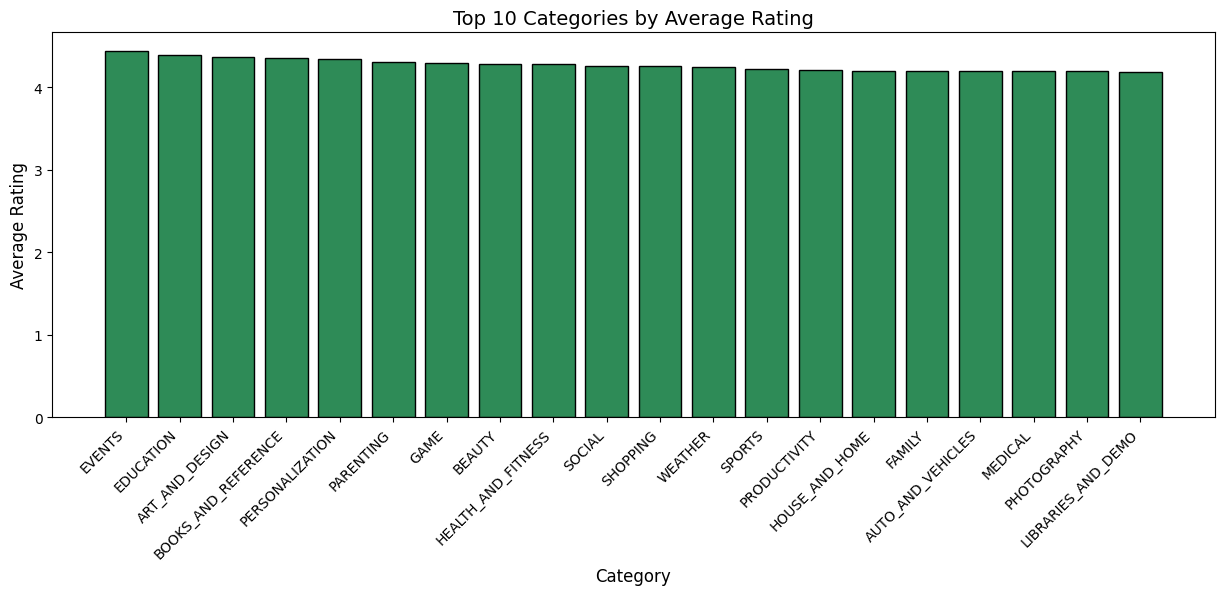

In [143]:
plt.figure(figsize=(15,5))
plt.bar(top_ratings.index, top_ratings.values, color='seagreen', edgecolor='black')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Top 10 Categories by Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
#fig = plt.gcf()
#ax = plt.gca()
#fig.patch.set_facecolor('lightblue')
#ax.set_facecolor('yellow')
plt.show()

In [8]:
df['Installs'] = df['Installs'].str.replace('[^\d]', '', regex=True).astype(int)

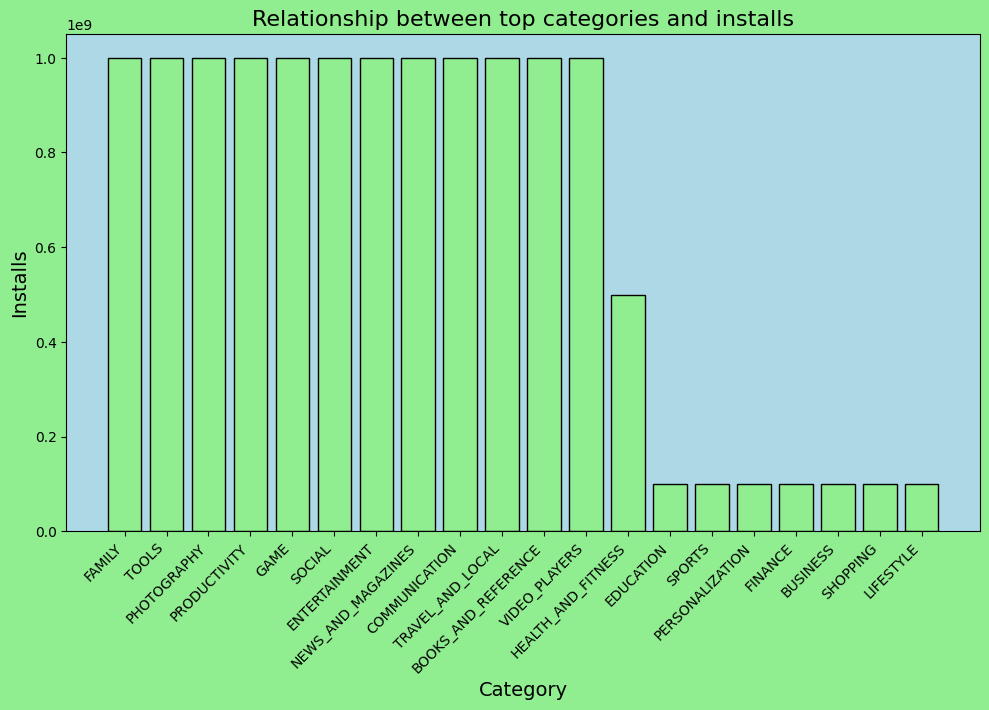

In [9]:
top_installs = df.groupby('Category')['Installs'].max().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
plt.bar(top_installs.index, top_installs.values, color='lightgreen', edgecolor='black')
plt.xlabel('Category', fontsize = 14)
plt.ylabel('Installs', fontsize = 14)
plt.title('Relationship between top categories and installs', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=45, ha='right', fontsize=10)
fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('lightgreen')
ax.set_facecolor('lightblue')
plt.show()

In [10]:
# Calculate the mean rating
mean_rating = df['Rating'].mean()

# Calculate the maximum number of reviews
max_reviews = df['Reviews'].max()

# Calculate the minimum price
min_price = df['Price'].min()

# Calculate the total number of apps
total_apps = df.shape[0]

# Print the statistics
print("Mean Rating:", mean_rating)
print("Max Reviews:", max_reviews)
print("Min Price:", min_price)
print("Total Apps:", total_apps)


Mean Rating: 4.191757420456972
Max Reviews: 9992
Min Price: $0.99 
Total Apps: 10840


Create DEEP LEARNING model to predict the number of installs for an app based on its other attributes.

## **3. Monetization Potential:**

### Can we identify categories where users are more willing to pay for apps? What pricing strategies are effective in these categories?

In [11]:
df[df['Type'] != 'Free']

,id,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,$4.99,Everyone,Business,25-Mar-18,1.5.2,4.0 and up
235,235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,$4.99,Everyone,Business,11-Apr-17,3.4.6,3.0 and up
290,290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,$4.99,Everyone,Business,25-Mar-18,1.5.2,4.0 and up
291,291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,$4.99,Everyone,Business,11-Apr-17,3.4.6,3.0 and up
427,427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,$3.99,Everyone,Communication,5-Jul-18,7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,10735,FP VoiceBot,FAMILY,NaN,17,157k,100,Paid,$0.99,Mature 17+,Entertainment,25-Nov-15,1.2,2.1 and up
10760,10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1000,Paid,$7.99,Everyone,Health & Fitness,8-Aug-18,1.9.3,4.2 and up
10782,10782,Trine 2: Complete Story,GAME,3.8,252,11M,10000,Paid,$16.99,Teen,Action,27-Feb-15,2.22,5.0 and up
10785,10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,10000,Paid,$1.20,Everyone,Puzzle,5-Jun-18,2.7,2.3 and up


In [12]:
df['Price'] = df['Price'].str.replace('[$]', '', regex=True).astype(float)

## **4. Top Selling Categories**

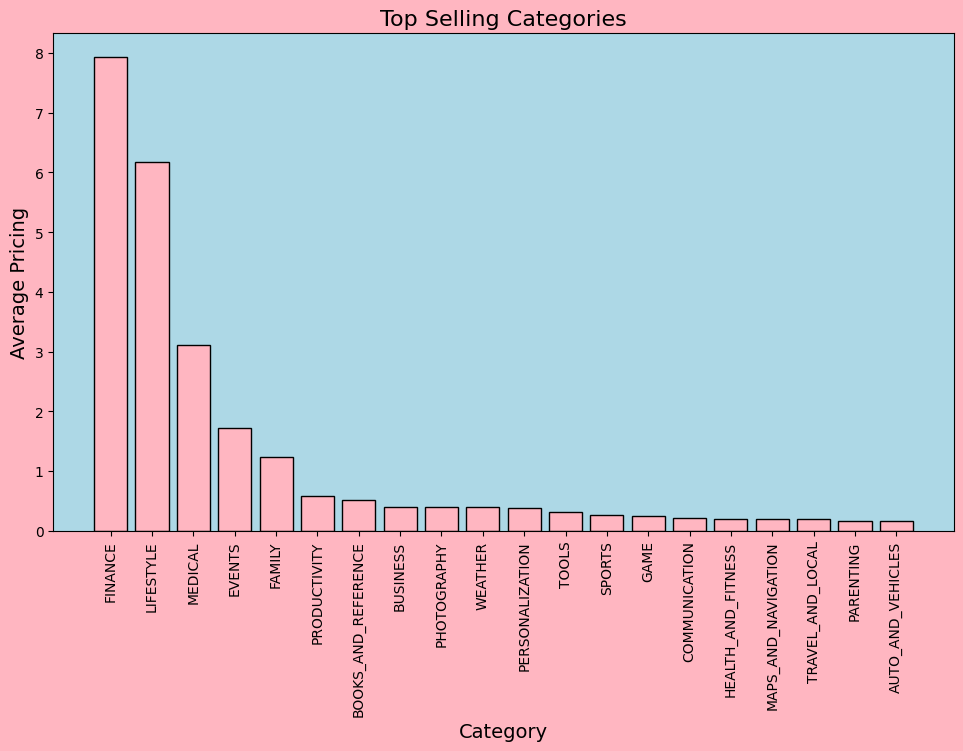

In [81]:
top_selling = df.groupby('Category')['Price'].mean().sort_values(ascending=False).round(2).head(20)

plt.figure(figsize=(10,6))
plt.bar(top_selling.index, top_selling.values, color='lightpink', edgecolor='black')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Pricing',fontsize=14)
plt.title('Top Selling Categories', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=90)
fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('lightpink')
ax.set_facecolor('lightblue')
plt.show()

## **5. Top Selling Apps**

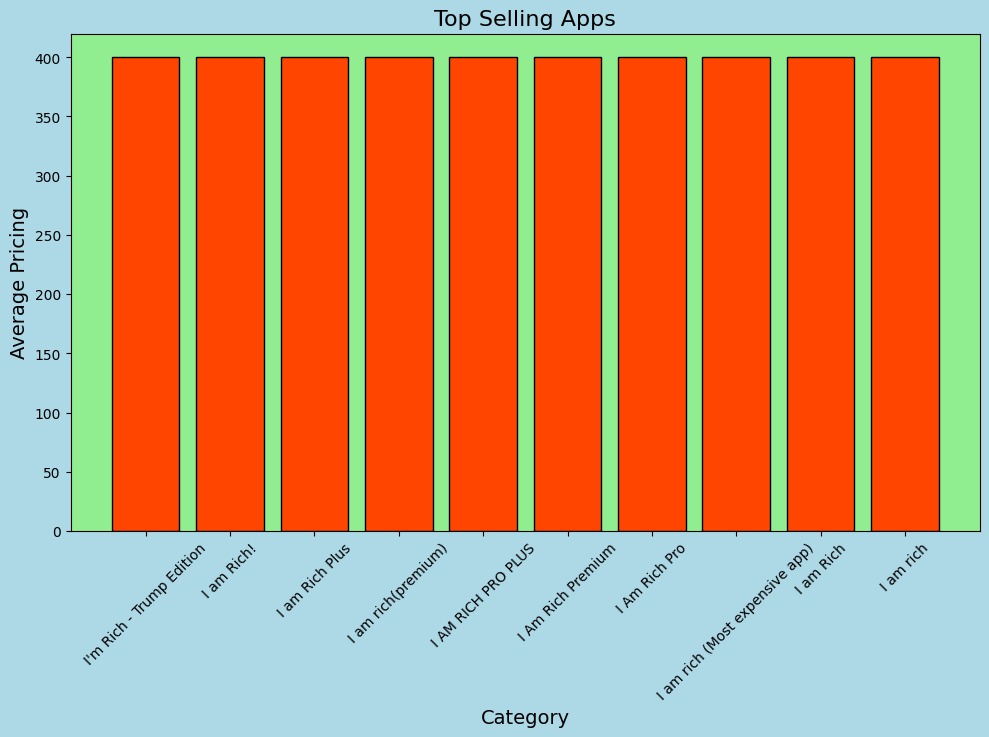

In [82]:
top_selling_apps = df.groupby('App')['Price'].mean().sort_values(ascending=False).round(2).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_selling_apps.index, top_selling_apps.values, color='orangered', edgecolor='black')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Pricing', fontsize=14)
plt.title('Top Selling Apps', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=45)
fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightgreen')
plt.show()

## **6. Most Successful Categories and Apps interms of reviews, ratings, number of installs**

In [13]:
df['Rating'] = df['Rating'].fillna(value=df['Rating'].mean())

In [14]:
df.isnull().sum()

id                0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [15]:
df['Reviews'] = df['Reviews'].astype(int)
df['Rating'] = df['Rating']
df['Installs'] = df['Installs'].astype(int)

In [16]:
df[(df['Reviews'] > df['Reviews'].quantile(0.999)) & 
                        (df['Rating'] > df['Rating'].quantile(0.184)) & 
                        (df['Installs'] > df['Installs'].quantile(0.994))]

,id,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
336,336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
381,381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
382,382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0.0,Everyone,Communication,1-Aug-18,Varies with device,Varies with device
2544,2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device
2545,2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device
2604,2604,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device
2611,2611,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device
3904,3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
3909,3909,Instagram,SOCIAL,4.5,66509917,Varies with device,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device
3943,3943,Facebook,SOCIAL,4.1,78128208,Varies with device,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device


## **7. Top 10 demanding genres**

In [151]:
top_genre = df.groupby('Genres')['Installs'].mean().sort_values(ascending=False).round(2).head(10)

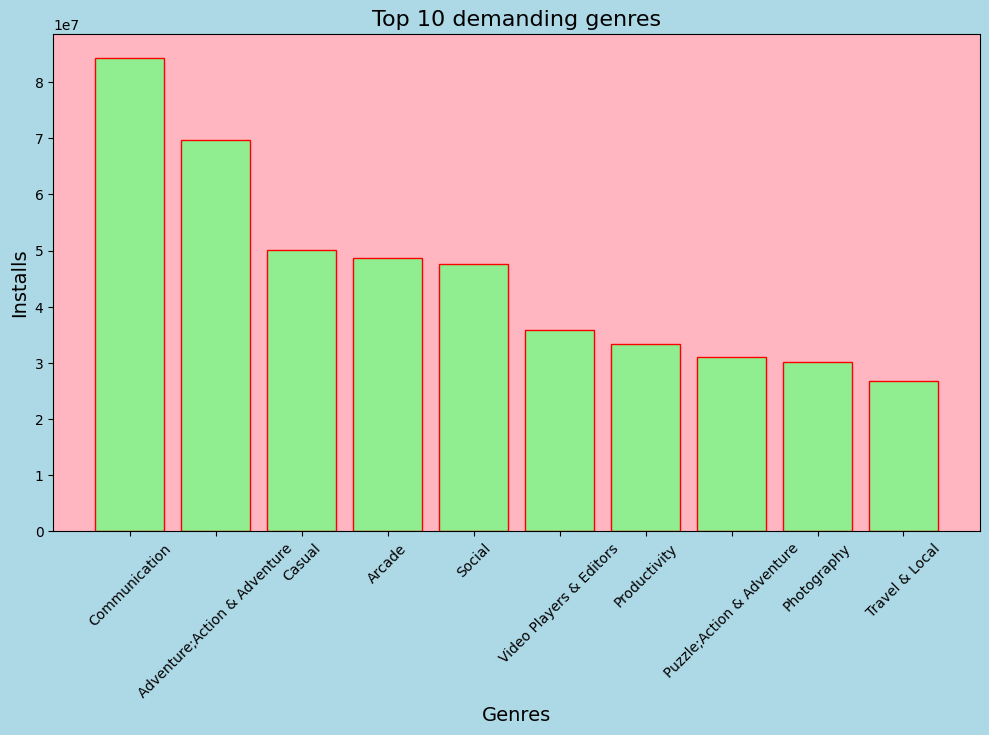

In [152]:
plt.figure(figsize=(10,6))
plt.title('Top 10 demanding genres', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Installs', fontsize=14)
plt.bar(top_genre.index, top_genre.values, color='lightgreen', edgecolor='red')
plt.tight_layout()
plt.xticks(rotation=45)
plt.gcf().patch.set_facecolor('lightblue')
plt.gca().set_facecolor('lightpink')
plt.show()

## **8. Top Paid Apps**

In [17]:
df[(df['Type'] != 'Free') &             
                        (df['Reviews'] > df['Reviews'].quantile(0.18)) & 
                        (df['Rating'] > df['Rating'].quantile(0.18)) & 
                        (df['Installs'] > df['Installs'].quantile(0.80))]

,id,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2241,2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,24-Jul-18,1.5.2.1,Varies with device
4034,4034,Hitman Sniper,GAME,4.6,408292,29M,10000000,Paid,0.99,Mature 17+,Action,12-Jul-18,1.7.110758,4.1 and up
4347,4347,Minecraft,FAMILY,4.5,2375336,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,24-Jul-18,1.5.2.1,Varies with device


## **9. Top Free Apps**

In [18]:
df[(df['Type'] == 'Free') &             
                        (df['Reviews'] > df['Reviews'].quantile(0.999)) & 
                        (df['Rating'] > df['Rating'].quantile(0.18)) & 
                        (df['Installs'] > df['Installs'].quantile(0.994))]

,id,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
336,336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
381,381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
382,382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0.0,Everyone,Communication,1-Aug-18,Varies with device,Varies with device
2544,2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device
2545,2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device
2604,2604,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device
2611,2611,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device
3904,3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
3909,3909,Instagram,SOCIAL,4.5,66509917,Varies with device,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device
3943,3943,Facebook,SOCIAL,4.1,78128208,Varies with device,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device


## **10. Top Categories in Content Rating**

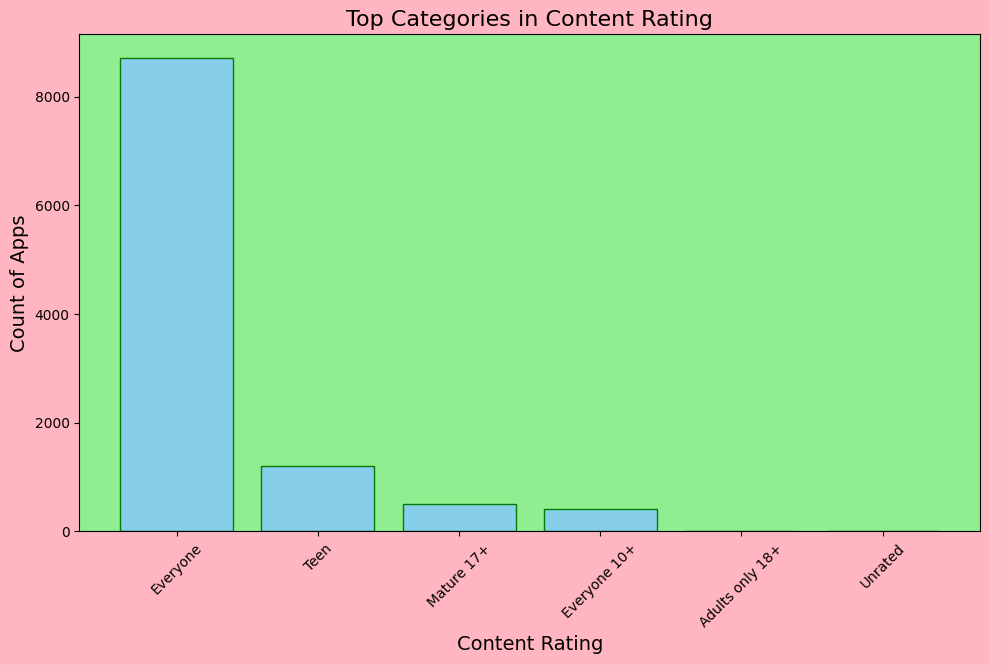

In [19]:
top_cat = df.groupby('Content Rating')['App'].count().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(top_cat.index, top_cat.values, color='skyblue', edgecolor='green')
plt.title('Top Categories in Content Rating', fontsize=16)
plt.xlabel('Content Rating', fontsize=14)
plt.ylabel('Count of Apps', fontsize=14)
plt.tight_layout()
plt.xticks(rotation=45)
plt.gca().patch.set_facecolor('lightgreen')
plt.gcf().set_facecolor('lightpink')
plt.show()

# Models

### Neural Network Model to predict the rating of the app based on the features of the app

Imports

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

Preprocessing the data

In [156]:
#if type is NaN then replace it with Free
df['Type'] = df['Type'].fillna('Free')
#Preprocessing the data
df['Price'] = df['Price'].astype(str).str.replace('[$]', '', regex=True).astype(float)
df['Installs'] = df['Installs'].astype(str).str.replace('[^\d]', '', regex=True).astype(float)

In [174]:
df.head()

,id,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


Split data into training and testing

#### undersampling

In [178]:
lower_bound = 4.0
upper_bound = 4.8
undersampling_ratio = 0.1

filtered_df = df[(df['Rating'] >= lower_bound) & (df['Rating'] <= upper_bound)]
num_samples_to_keep = int(len(filtered_df) * undersampling_ratio)
undersampled_df = filtered_df.sample(n=num_samples_to_keep, random_state=42)

unders_dataset = df.drop(filtered_df.index)
unders_dataset = pd.concat([unders_dataset,undersampled_df])

# Optionally, combine the undersampled subset with other samples if needed
# combined_df = pd.concat([undersampled_df, other_samples_df], axis=0)

print("Original dataset size:", len(df))
print("Undersampled dataset size:", len(unders_dataset))

Original dataset size: 10840
Undersampled dataset size: 3207


In [179]:
cat_features = ['Category','Content Rating']
num_features = ['Reviews', 'Installs']

#X = df[num_features]
#y = df['Rating'].astype(float)
X = df[num_features+cat_features]
y = df['Rating'].astype(float)

In [180]:
y.value_counts()

Rating
4.191757    1474
4.400000    1109
4.300000    1076
4.500000    1038
4.200000     952
4.600000     823
4.100000     708
4.000000     568
4.700000     499
3.900000     386
3.800000     303
5.000000     274
3.700000     239
4.800000     234
3.600000     174
3.500000     163
3.400000     128
3.300000     102
4.900000      87
3.000000      83
3.100000      69
3.200000      64
2.900000      45
2.800000      42
2.700000      25
2.600000      25
2.500000      21
2.300000      20
2.400000      19
1.000000      16
2.200000      14
1.900000      13
2.000000      12
1.700000       8
1.800000       8
2.100000       8
1.600000       4
1.400000       3
1.500000       3
1.200000       1
Name: count, dtype: int64

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model

In [37]:
min(unders_dataset['Rating'])

1.0

In [182]:
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_features),
        ('num', num_transformer, num_features)
    ])

In [190]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor) , ('model',MLPRegressor(hidden_layer_sizes=(20, 10), activation='relu', solver='adam', random_state=42, verbose=True, max_iter=600))])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Category',
                                                   'Content Rating']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Reviews', 'Installs'])])),
                ('model',
                 MLPRegressor(hidden_layer_sizes=(20, 10), max_iter=600,
                              random_state=42, verbose=True))])

In [157]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor) , ('model',SVR(kernel='poly',degree=3,epsilon=0.2))])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Category',
                                                   'Content Rating']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Reviews', 'Installs'])])),
                ('model', SVR(epsilon=0.2, kernel='poly'))])

In [191]:
pipeline.fit(X_train, y_train)

Iteration 1, loss = 4.45679772
Iteration 2, loss = 2.08173366
Iteration 3, loss = 0.44196809
Iteration 4, loss = 0.20234763
Iteration 5, loss = 0.15459550
Iteration 6, loss = 0.13437526
Iteration 7, loss = 0.12347631
Iteration 8, loss = 0.11808962
Iteration 9, loss = 0.11540733
Iteration 10, loss = 0.11396129
Iteration 11, loss = 0.11319213
Iteration 12, loss = 0.11268635
Iteration 13, loss = 0.11216684
Iteration 14, loss = 0.11187799
Iteration 15, loss = 0.11165372
Iteration 16, loss = 0.11138154
Iteration 17, loss = 0.11124487
Iteration 18, loss = 0.11103495
Iteration 19, loss = 0.11098698
Iteration 20, loss = 0.11083309
Iteration 21, loss = 0.11079389
Iteration 22, loss = 0.11058691
Iteration 23, loss = 0.11050078
Iteration 24, loss = 0.11037495
Iteration 25, loss = 0.11032850
Iteration 26, loss = 0.11027586
Iteration 27, loss = 0.11027878
Iteration 28, loss = 0.11025651
Iteration 29, loss = 0.11016369
Iteration 30, loss = 0.11017101
Iteration 31, loss = 0.11017803
Iteration 32, los

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Category',
                                                   'Content Rating']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Reviews', 'Installs'])])),
                ('model',
                 MLPRegressor(hidden_layer_sizes=(20, 10), max_iter=600,
                              random_state=42, verbose=True))])

In [192]:
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.20644383904553362


In [186]:
score = pipeline.score(X_test, y_test)
print("Model R^2 Score:", score)

Model R^2 Score: 0.0390056885445228


In [187]:
pred = pipeline.predict(X_test.iloc[[20]])
print(y_test.iloc[20],pred)

4.3 [4.18708874]


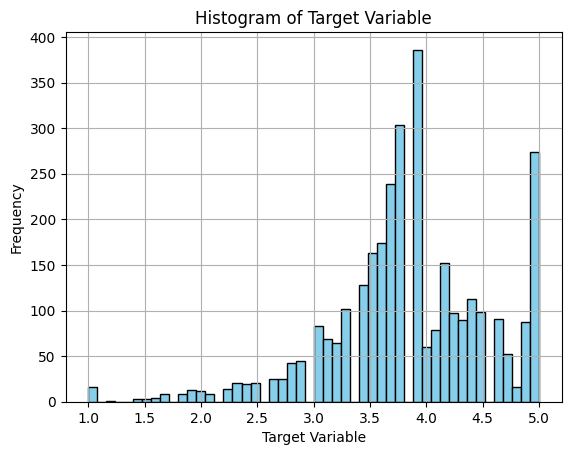

In [188]:
plt.hist(unders_dataset['Rating'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

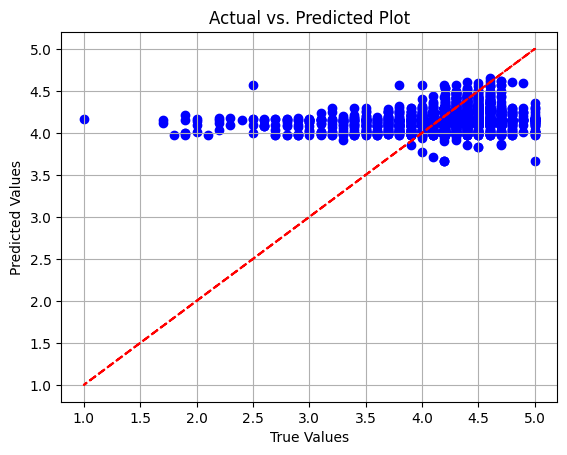

In [189]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('Actual vs. Predicted Plot')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [164]:
X = unders_dataset[num_features+cat_features]
y = unders_dataset['Rating'].astype(float)

In [165]:
model = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

ValueError: could not convert string to float: 'FINANCE'

Test accuracy

In [127]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7956642066420664


In [ ]:
confusion_matrix(y_test, y_pred)

In [132]:
# test accuracy by providing a sample data
# sample data form is [[Reviews, Size, Installs, Price]]
sample_data = [[1000, 50, 10000]]
sample_data = scaler.transform(sample_data)

rating = model.predict(sample_data)
print("Predicted Rating:", rating)

# test accuracy by providing a sample data

sample_data = [[1000, 50, 10000]]
sample_data = scaler.transform(sample_data)

rating = model.predict(sample_data)
print("Predicted Rating:", rating)

Predicted Rating: [3]
Predicted Rating: [3]


/Users/banoczymartin/OE projects II/Deep-Learning-Experiments/vince_dl/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/banoczymartin/OE projects II/Deep-Learning-Experiments/vince_dl/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
